In [2]:
import numpy as np
import pandas as pd
from monte_carlo_sensitivity import perturbed_run, sensitivity_analysis
from verma_net_radiation import verma_net_radiation_table
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")
input_df = input_df[["Rg", "albedo", "ST_C", "EmisWB", "Ta_C", "RH"]]
input_df = input_df.dropna()
input_df

,Rg,albedo,ST_C,EmisWB,Ta_C,RH
0,0.000000,0.027717,0.89,0.972,-2.512519,1.000000
1,0.000000,0.036438,35.39,0.940,4.822851,0.630401
2,0.000000,0.077051,13.17,0.966,11.629330,0.814974
4,19.590548,0.115091,28.03,0.974,26.243547,0.556663
5,5.813275,0.123871,24.61,0.948,26.553339,0.547092
...,...,...,...,...,...,...
244,0.000000,0.109698,1.15,0.970,5.191363,0.420223
245,0.000000,0.059555,8.09,0.956,12.657937,0.599936
246,63.251832,0.115424,29.33,0.974,29.333225,0.609216
247,32.857876,0.162858,26.43,0.962,29.102583,0.696927


In [4]:
run_df = perturbed_run(input_df, "ST_C", "Rn", verma_net_radiation_table)
run_df

[2025-07-22 13:42:48 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:48 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP


,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,ST_C,Rn,0.89,3.136340,0.473643,4.026340,0.000000,0.000000,0.000000,0.000000
1,ST_C,Rn,0.89,1.491340,0.225219,2.381340,0.000000,0.000000,0.000000,0.000000
2,ST_C,Rn,0.89,5.615365,0.848019,6.505365,0.000000,0.000000,0.000000,0.000000
3,ST_C,Rn,0.89,-2.060773,-0.311213,-1.170773,0.000000,0.000000,0.000000,0.000000
4,ST_C,Rn,0.89,-2.866281,-0.432859,-1.976281,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
17395,ST_C,Rn,30.71,-0.802399,-0.121176,29.907601,169.525148,4.872222,0.101782,174.397370
17396,ST_C,Rn,30.71,4.409431,0.665902,35.119431,169.525148,-27.471448,-0.573888,142.053700
17397,ST_C,Rn,30.71,-4.160607,-0.628325,26.549393,169.525148,24.847576,0.519074,194.372724
17398,ST_C,Rn,30.71,-5.896542,-0.890482,24.813458,169.525148,34.913475,0.729354,204.438623


In [5]:
np.nanmean(run_df.output_perturbation_std)

np.float64(0.028755847480330124)

In [6]:
input_variables = ["ST_C", "EmisWB", "albedo", "Rg", "Ta_C", "RH"]
output_variables = ["Rn"]

perturbation_df, sensitivity_metrics_df = sensitivity_analysis(
    input_df=input_df,
    input_variables=input_variables,
    output_variables=output_variables,
    forward_process=verma_net_radiation_table
)

sensitivity_metrics_df

[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP
[2025-07-22 13:42:55 INFO] GEOS-5 FP download directory: ~/data/GEOS5FP


/opt/homebrew/Caskroom/miniforge/base/envs/verma-net-radiation/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perturbation_df = pd.concat([perturbation_df, run_results])
/opt/homebrew/Caskroom/miniforge/base/envs/verma-net-radiation/lib/python3.10/site-packages/monte_carlo_sensitivity/sensitivity_analysis.py:89: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sensitivity_metrics_df = pd.concat([sensitivity_metrics_df, 

,input_variable,output_variable,metric,value
0,ST_C,Rn,correlation,-0.522308
0,ST_C,Rn,r2,0.272806
0,ST_C,Rn,mean_normalized_change,0.027253
0,EmisWB,Rn,correlation,-0.432981
0,EmisWB,Rn,r2,0.187473
0,EmisWB,Rn,mean_normalized_change,0.001636
0,albedo,Rn,correlation,-0.375567
0,albedo,Rn,r2,0.141050
0,albedo,Rn,mean_normalized_change,-0.001294
0,Rg,Rn,correlation,0.662649


/var/folders/bv/410kt7f93x78j9dww00h1pz80000gn/T/ipykernel_91241/2022254417.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])


Text(0.5, 1.0, 'Verma Net Radiation Sensitivity')

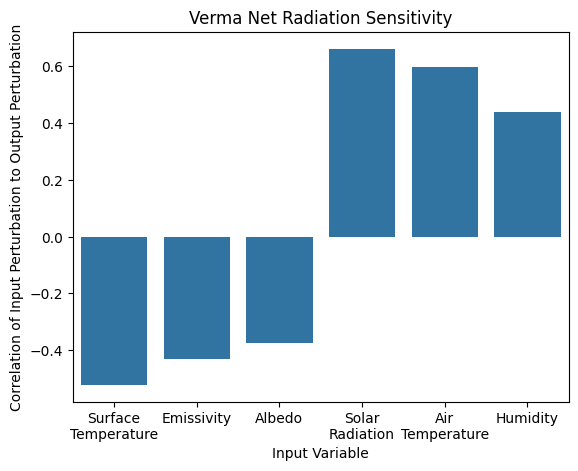

In [7]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "correlation")]
df = df.dropna()
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])
plt.xlabel("Input Variable")
plt.ylabel("Correlation of Input Perturbation to Output Perturbation")
plt.title("Verma Net Radiation Sensitivity")

/var/folders/bv/410kt7f93x78j9dww00h1pz80000gn/T/ipykernel_91241/2309426928.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])


Text(0.5, 1.0, 'Verma Net Radiation Sensitivity')

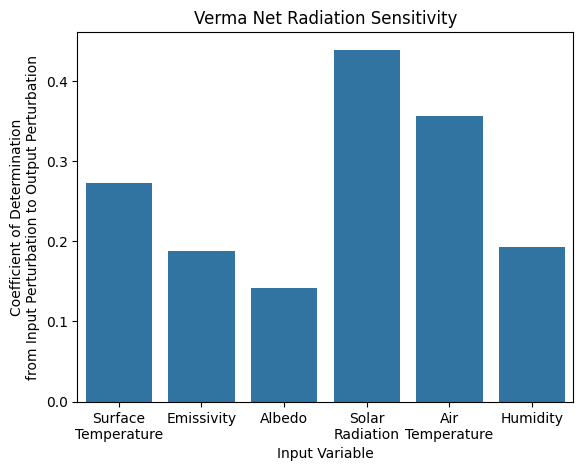

In [8]:
df = sensitivity_metrics_df
df = df[(df.output_variable == "Rn") & (df.metric == "r2")]
df = df.dropna()
df = df[df.value>0]
ax = sns.barplot(x=df.input_variable, y=df.value)
ax.set_xticklabels(["Surface\nTemperature", "Emissivity", "Albedo", "Solar\nRadiation", "Air\nTemperature", "Humidity"])
plt.xlabel("Input Variable")
plt.ylabel("Coefficient of Determination\nfrom Input Perturbation to Output Perturbation")
plt.title("Verma Net Radiation Sensitivity")